<IPython.core.display.Javascript object>


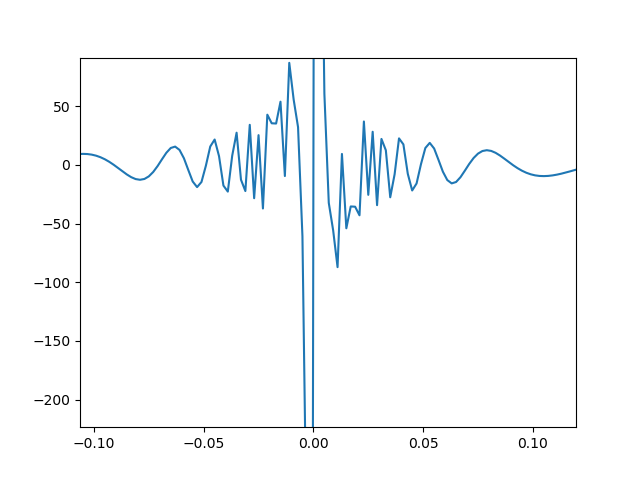

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

%matplotlib notebook

def objfun(x):
    f=np.cos(1/x)/x
    return f

t=np.linspace(-1,1,1000)
ft=objfun(t)
plt.plot(t,ft)


Now, try it yourself with a 2D function - this is the "Eggholder" function (according to wikipedia, and it is notoriously bumpy. Try to MINIMISe it.

<IPython.core.display.Javascript object>


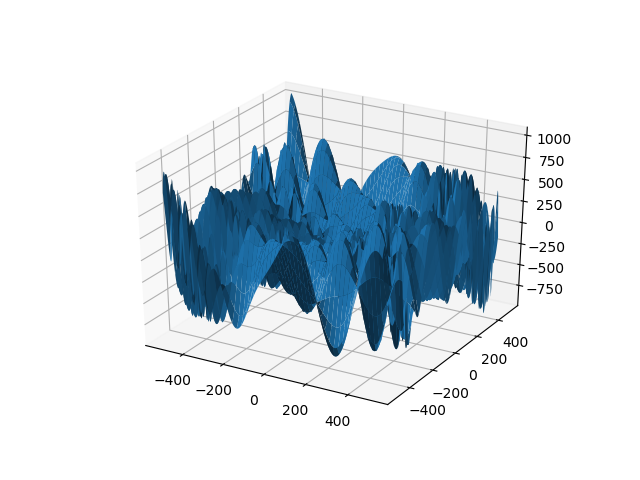

In [5]:
from mpl_toolkits.mplot3d import Axes3D # This import has side effects required for the kwarg projection='3d' in the call to fig.add_subplot

def objfun2d(x,y):
    f=-(y+47)*np.sin(np.sqrt(np.abs(x/2+y+47)))-x*np.sin(np.sqrt(np.abs(x-y-47)))
    return f

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
x = y = np.arange(-512, 512, 1)
X, Y = np.meshgrid(x, y)
zs = np.array([objfun2d(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

Sample simple Genetic Algorithm -  code modified for 2D objective function

Generation:  0  maximum fitness = 2751.3368575896047  at  1.0014775467248604e-15
Generation:  1  maximum fitness = 2755.5530971692115  at  1.0014775467248604e-15
Generation:  2  maximum fitness = 2885.6141297907657  at  5.820874565774098e-11
Generation:  3  maximum fitness = 2749.7698645708506  at  3.725292021584427e-09
Generation:  4  maximum fitness = 2697.8490404249615  at  2.913397528867684e-11
Generation:  5  maximum fitness = 2826.129531260114  at  5.9604703341932e-08
Generation:  6  maximum fitness = 2735.115682885278  at  1.4901162915235446e-08
Generation:  7  maximum fitness = 2784.790048109721  at  1.0014775467248604e-15
Generation:  8  maximum fitness = 2784.468012402007  at  4.554950167046101e-15
Generation:  9  maximum fitness = 2778.3660921644505  at  1.7231767228398365e-15
Generation:  10  maximum fitness = 2791.610975721097  at  1.7231225127312122e-15
Generation:  11  maximum fitness = 2782.2575658506257  at  1.0014775467248604e-15
Generation:  12  maximum fitness = 278

<IPython.core.display.Javascript object>


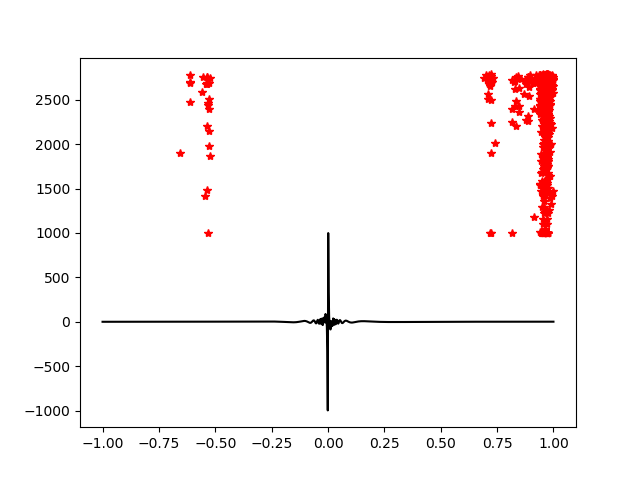

In [19]:
n=1000 #population
parents1=np.random.rand(n)
parents2=np.random.rand(n)
ngen=50 #number of generations
ngene=64 #coding dependent - we're in a 64-bit world
gen=0
pmut=0.01 #bit-wise/gene-wise mutation rate

while gen<ngen:
    
    #fit=objfun(parents)
    fit=objfun2d(1000*parents1,1000*parents2)
    i=1
    children1=np.array([])
    children2=np.array([])

    #children=np.append(children,parents[np.argmax(fit)]) 

    
    for i in range(0,n): # make n children, parents are polyganous and reproduction is asexual
        
        #this is the full GA, for a single generation
        
        #first, breed --- parents1
        fit=abs(fit*(fit>0)+1) #objective function fitness must be non-negative
        pdf=fit/np.sum(fit)  #probability of each being the parent
        (mum,dad)=np.random.choice(n,2,p=pdf)  #choose mum and dad
        ggene=np.random.randint(0,ngene)    #choose crossover
        shift=2**ggene 
        kid= ( mt.floor(parents1[mum]*shift) + (parents1[dad]*shift)%1 ) #mum+dad
        
        #then mutate (a bit trickier - but essentially just corrupting bits with probability p):
        kid= mt.floor(kid* (2**(ngene-ggene))) #big kid (long-int)
        imut= int(np.sum(2**np.argwhere((np.random.rand(ngene)<pmut))))
        kid= kid^imut # mutation
        kid=kid/(2**ngene) 
        
        #add the new kid to the list of children
        children1=np.append(children1,kid)
        
        #first, breed - parents2
        (mum,dad)=np.random.choice(n,2,p=pdf)  #choose mum and dad
        ggene=np.random.randint(0,ngene)    #choose crossover
        shift=2**ggene 
        kid= ( mt.floor(parents2[mum]*shift) + (parents2[dad]*shift)%1 ) #mum+dad
        
        #then mutate (a bit trickier - but essentially just corrupting bits with probability p):
        kid= mt.floor(kid* (2**(ngene-ggene))) #big kid (long-int)
        imut= int(np.sum(2**np.argwhere((np.random.rand(ngene)<pmut))))
        kid= kid^imut # mutation
        kid=kid/(2**ngene) 
        
        #add the new kid to the list of children
        children2=np.append(children2,kid)
        



        
    parents1=children1
    parents2=children2
    
    #report 
    print("Generation: ",gen," maximum fitness =",max(fit),' at ',parents[np.argmax(fit)])

    #and repeat
    gen+=1
    
plt.figure()    
plt.plot(parents1,fit,'r*')
plt.plot(t,ft,'k')
plt.show()